## Assignment_Week5

**Instructions:**

- Submit your work as a `.ipynb` notebook file on blackboard.

- Please name your `.ipynb` file using the following format: `firstname_Assignment_Week5.ipynb`


**This assignment has two parts - first, implementing decision trees, random forests, and GBRT (optional) on the heart disease dataset. Second, proposing a machine learning project idea for the 540 course project. We've now covered many machine learning algorithms for both regression and classification. It's time to start thinking about potential projects to apply what you've learned.**

<br>

### Part 1: Exploring Decision Trees, Random Forests, and GBRT on Heart Disease Data

**Goal**: In this part, we implemented and tuned Decision Trees, Random Forests, and Gradient Boosted Regression Trees(optional) on a heart disease dataset, comparing their performances to determine the best technique for the given data.

### About Dataset

#### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 


#### Attribute Information:
- age: Age of the patient.
- sex: Gender (1 for male and 0 for female).
- cp: Chest pain type (with four distinct types represented by numbers 1-4).
- trestbps: Resting blood pressure (in mm Hg upon admission to the hospital).
- chol: Serum cholesterol in mg/dl.
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- restecg: Resting electrocardiographic results (values 0,1,2).
- thalach: Maximum heart rate achieved.
- exang: Exercise-induced angina (1 = yes; 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment.
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: A short for thalassemia, a blood disorder (3 = normal; 6 = fixed defect; 7 = reversible defect).


- **hd**: Presence of heart disease (1 = true; 0 = false).

<br>

### Task 1: Load the Dataset and Check Basic Information
- Check data structure, variables, and potential issues (like missing values)   
 *There's no specific requirement for what to check; choose what you feel is most relevant and informative. (for example, the shape of the dataset, Summary of the data)*

In [1]:

# Import packages
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\wisdo\\ANA 540 - Adavanced Data Analytics\\Week 05\\Assignment'

In [15]:
# Load Dataset 
data = pd.read_csv("C:\\Users\\wisdo\\OneDrive\\Desktop\\MCDaniel\\CourseWork\\ANA 540\\week 05\\Assignment\\heart disease.csv")
# Convert the dataset to a DataFrame
heartd_df = pd.DataFrame(data)
heartd_df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [16]:
# Examine Basic Information
print(heartd_df.head())

    age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   1  
2    2.0  2.0  7.0   1  
3    3.0  0.0  3.0   0  
4    1.0  0.0  3.0   0  


In [17]:
#Checking the shape
print(heartd_df.shape)

(303, 14)


In [18]:
#Checking missing values
print(heartd_df.isnull().sum())

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64


In [19]:
#Checking columns and their data types
heartd_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [20]:
#Generating descriptive statistics
heartd_df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Task 2: Handle Missing Values
Ensure the dataset is free from missing values to prevent issues during modeling.
- For this dataset, missing values are represented as '?'.
- For this task, choose to simply remove all rows with missing values

In [12]:
#pip install missingno

In [60]:
import missingno as msno

# Replacing all occurrences of '?' with NaN (missing values)
heartd_df.replace('?', pd.NA, inplace=True)

In [61]:
# Removing rows with missing values
heartd_df.dropna(inplace=True)

# Reseting the index
heartd_df.reset_index(drop=True, inplace=True)
heartd_df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Task 3: One-Hot Encoding

- 1. Use the `pd.get_dummies()` function or an equivalent method to perform one-hot encoding 
- 2. Display the first few rows of the transformed dataset to verify the encoding.
- 3. Check the shape of the dataset after encoding

These are categorical variables and their levels in this dataset

- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [62]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_encoded = pd.get_dummies(heartd_df, columns=categorical_columns)

In [63]:
# Display the first few rows of the transformed dataset
print(df_encoded.head())

    age  restbp   chol  thalach  oldpeak   ca  hd  sex_0.0  sex_1.0  cp_1.0  \
0  63.0   145.0  233.0    150.0      2.3  0.0   0        0        1       1   
1  67.0   160.0  286.0    108.0      1.5  3.0   1        0        1       0   
2  67.0   120.0  229.0    129.0      2.6  2.0   1        0        1       0   
3  37.0   130.0  250.0    187.0      3.5  0.0   0        0        1       0   
4  41.0   130.0  204.0    172.0      1.4  0.0   0        1        0       0   

   ...  restecg_1.0  restecg_2.0  exang_0.0  exang_1.0  slope_1.0  slope_2.0  \
0  ...            0            1          1          0          0          0   
1  ...            0            1          0          1          0          1   
2  ...            0            1          0          1          0          1   
3  ...            0            0          1          0          0          0   
4  ...            0            1          1          0          1          0   

   slope_3.0  thal_3.0  thal_6.0  thal_7.0  

In [64]:
# Check the shape of the encoded dataset
print("Shape of the encoded dataset:", df_encoded.shape)

Shape of the encoded dataset: (297, 26)


### Task 4: Split the Data into Training and Test Sets
  - Split the data into 75% training and 25% test sets. 
    
  - Use random_state=42
  - Verify the sizes of the training and test datasets

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the target variable
y = heartd_df['hd']

# Define the features, excluding the target variable
X = heartd_df.drop(columns=['hd'])

# Split the data into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
# Verify the sizes of the training and test datasets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 222
Test set size: 75


### Task 5: Build A Preliminary Classification Tree
- Initialize a Decision Tree classifier. You can use the default parameters for the initial model.
- Fit the classifier using the training data.

- Calculate and display the accuracy of the classifier on both the training and test datasets to see its performance.


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [68]:
# Initialize a Decision Tree classifier (using default parameters)
clf = DecisionTreeClassifier()

In [69]:
# Fit the classifier using the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# Predicting on the training and test data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Calculating and display the accuracy on both the training and test datasets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.0
Test Accuracy: 0.81


**Question: Given the results of the Training Accuracy score and Test Accuracy score for this initial model, would you consider this model to be overfitting? Why or why not?**

The Training Accuracy score of 1.0 (100%) and the Test Accuracy score of 0.81 (81%) indicate that there is a significant difference in performance between the training and test datasets. In this context, this discrepancy suggests that the initial model is likely overfitting.

Here's why:

- Training Accuracy of 1.0: A Training Accuracy score of 1.0 means that the model has perfectly fit the training data, achieving 100% accuracy. It suggests that the model has essentially memorized the training data and can make perfect predictions on it.

- Test Accuracy of 0.81: While a Test Accuracy of 0.81 is relatively good, it's significantly lower than the Training Accuracy. This drop in accuracy when moving from the training dataset to the test dataset is a strong indicator of overfitting.

### Task 6: Tune Parameters of the Decision Tree

Given that we've built a preliminary decision tree, now explore how tuning parameters can influence its performance. In our decision tree lectures and the accompanying notebooks, we discussed and displayed pre-pruning. We also touched upon Cost Complexity Pruning in last week's instructional notebook. In this assignment, we practice pre-pruning using the `max_depth` parameter.
- Initialize a Decision Tree classifier. This time, set the `max_depth` parameter to 3 to limit the depth of the tree. 
- Ensure you also set `random_state=42` for consistent results.
- Fit the classifier with the training data.
- Calculate and display the accuracy of the classifier on both the training and test datasets. 

In [75]:
# Initialize a Decision Tree classifier with max_depth=3 (pre-pruning)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [76]:
# Fit the classifier using the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [78]:
# Predict on the training and test data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Calculate and display the accuracy on both the training and test datasets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.81


**Question: Based on the accuracy scores you've obtained after constraining the tree depth, how do you think limiting the max_depth parameter affects the model's ability to generalize to unseen data? Why?**

When limiting the max_depth parameter of a Decision Tree classifier, we are essentially restricting the depth of the tree,
which, in turn, limits the complexity of the model. Here, max_depth=3, which means the tree can only have 
a maximum depth of 3 levels.

Here's how limiting the max_depth parameter affects the model's ability to generalize to unseen data:

- Training Accuracy (0.85): The training accuracy is still relatively high but lower than what was achieved with the unpruned tree (Training Accuracy: 1.0). This indicates that the model has reduced overfitting on the training data.

- Test Accuracy (0.81): The test accuracy is similar to what is achieved with the unpruned tree (Test Accuracy: 0.81). This suggests that limiting the max_depth parameter has not significantly harmed the model's ability to generalize to unseen data. The test accuracy remains reasonably high, indicating that the model still performs well on the test dataset.

### Task 7: Explore Random Forests

Now that you've experimented with a single decision tree, let's explore how combining multiple trees can improve performance.
- Import the necessary libraries for Random Forest.
- Initialize a Random Forest classifier. *You can either build an initial model with default parameters, or choose to experiment with other parameters, such as n_estimators=100, max_depth=5*
- Fit the Random Forest classifier using the training data.
- Calculate and display the accuracy of the Random Forest classifier on both the training and test datasets. 


In [80]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# experimenting with specific parameters of random forest classifier
rf_classifier = RandomForestClassifier()

In [86]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
train_predictions = rf_classifier.predict(X_train)
test_predictions = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.87


**Question: Comparing the accuracy scores of the Random Forest and the single decision tree, which model performed better? Would we lean towards choosing the Random Forest? Why or why not?**

Comparing the accuracy scores of the Random Forest and the single Decision Tree:

Random Forest:

- Training Accuracy: 1.00
- Test Accuracy: 0.87

Single Decision Tree (with max_depth=3):

- Training Accuracy: 0.85
- Test Accuracy: 0.81

In terms of accuracy, the Random Forest outperforms the single Decision Tree on both the training and test datasets. The Random Forest has higher Training Accuracy (1.00 vs. 0.85) and Test Accuracy (0.87 vs. 0.81).

Random Forest is the preferred choice because it performs better in terms of accuracy and generalization to unseen data.

### Task 8: Investigate Feature Importance with Random Forests
Gain insights into the most influential features in the dataset using the Random Forest model.

- Extract the feature importances from the trained Random Forest model. The `feature_importances_` attribute of the model provides this information.
- Optional: Visualize the feature importances using a bar chart for better clarity.

In [88]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

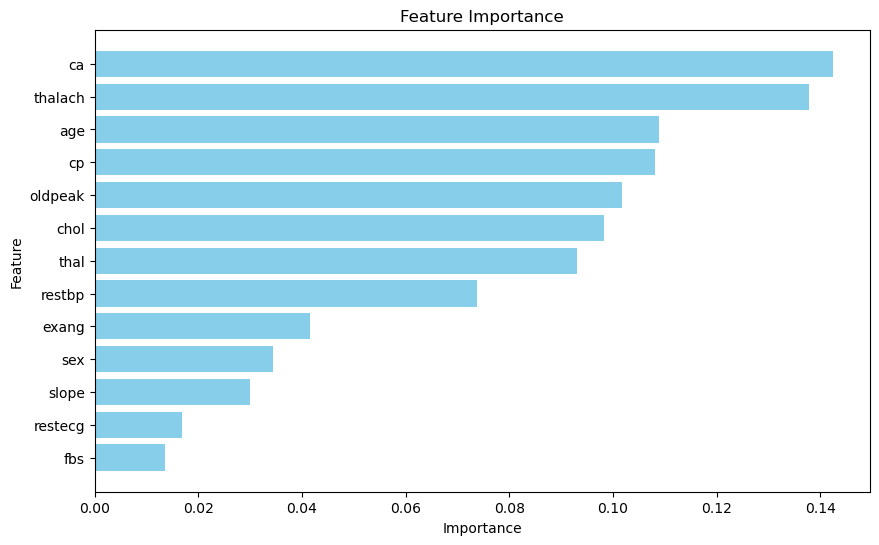

In [89]:
# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

#### Question: Which features stand out as the most influential?

- ca: Number of major vessels (0-3) colored by fluoroscopy. Stand out as the most influential variable in predicting the model.

### Optional Task 9: Dive into Gradient Boosted Regression Trees (GBRT)
Explore the capabilities of Gradient Boosted Regression Trees and compare its performance with other models.
- Implement a GBRT model using the training data. You can use the default parameters or experiment with settings like `n_estimators`, `learning_rate`, and `max_depth`.
- Train the GBRT model using the training dataset.
- Calculate and display the accuracy of the GBRT model on both the training and test datasets.
- Compare the performance of the GBRT model with the single decision tree and the Random Forest model you previously trained. 


In [104]:
#Import related libraries
from sklearn.ensemble import GradientBoostingClassifier
# Initializing GBRT classifier with default parameters and experimenting with specific parameters
gbrt_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [105]:
#Train the GBRT model using the training dataset.
gbrt_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [106]:
train_predictions = gbrt_classifier.predict(X_train)
test_predictions = gbrt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"GBRT Training Accuracy: {train_accuracy:.2f}")
print(f"GBRT Test Accuracy: {test_accuracy:.2f}")

GBRT Training Accuracy: 0.99
GBRT Test Accuracy: 0.80


Analysis:

Training Accuracy:
- The Random Forest model achieved the highest Training Accuracy (1.00), indicating that it perfectly fit the training data. This could be a sign of overfitting.
- The GBRT model also performed very well on the training data with a Training Accuracy of 0.99, indicating a strong fit to the training data.
- The single Decision Tree achieved a lower Training Accuracy of 0.85, which suggests it may have reduced overfitting compared to the Random Forest and GBRT models.

Test Accuracy:
- The Random Forest model achieved the highest Test Accuracy (0.87) among the three models, indicating better generalization to unseen data compared to its Training Accuracy.
- The single Decision Tree and GBRT models had similar Test Accuracy scores (0.81 and 0.80, respectively). While the Decision Tree's Test Accuracy was slightly higher, the difference is not substantial.

Overall Observation:

- The Random Forest model appears to have the best balance between Training Accuracy and Test Accuracy, suggesting it generalizes well to unseen data while also fitting the training data effectively.
- The GBRT model, despite having a high Training Accuracy, has a slightly lower Test Accuracy, indicating some degree of overfitting.
- The single Decision Tree, with limited depth (max_depth=3), shows improved generalization compared to the default Decision Tree but still has a similar Test Accuracy to the GBRT model.

### Part 2: Starting Your ANA540 Machine Learning Project


Here are the key considerations for your machine learning project:

#### Define the Problem Statement:

- What specific issue or question do you want to address with machine learning?
- Is there a particular domain or industry you're interested in, such as healthcare, education, or social media?



#### Determine the Type of Machine Learning Problem:

- **Classification**: Will you predict categories or labels? (e.g. spam vs not spam)
- **Regression**: Will you forecast continuous numerical values? (e.g. housing prices)
- **Clustering**: Will you group data based on similarities, without prior labels? (Covered Week 8)
- **Dimensionality Reduction**: Will you reduce the number of features while retaining information? (e.g. PCA) (Covered Week 7)

#### Assess Data Sources

- Do you have a specific dataset in mind? If not, where can you obtain relevant data?
- Remember, the quality and quantity of data can significantly influence the project's outcomes.
- Ensure you understand the features present in the dataset and what they represent.

#### Draft a Project Proposal Paragraph:
Building on the considerations outlined above, craft a brief paragraph detailing your ANA540 project. This should clearly state the problem you aim to address, the type of machine learning technique you intend to use, and a brief overview of the data source(s) you'll be using (if you have already determined the dataset). 

This will serve as a starting point that we can refine further.

#### Project Proposal: Exploring the Future of Healthcare: Machine Learning-Powered Diabetes Risk Assessment

##### 1. Introduction
Diabetes is a prevalent and chronic health condition that impacts the lives of millions of individuals worldwide. Early detection and proactive intervention are paramount for effectively managing diabetes. Leveraging the capabilities of machine learning, this project aims to develop a predictive model for identifying individuals at risk of diabetes. The model will utilize a diverse set of health and demographic features to enable timely and informed intervention.

##### 2. Problem Statement
This project seeks to address the critical issue of diabetes prediction with the following objectives:
- Prediction Accuracy: Develop a robust machine learning model capable of accurately predicting the likelihood of diabetes onset.
- Early Intervention: Identify individuals at high risk of developing diabetes to facilitate early intervention, lifestyle adjustments, and improved health outcomes.
- Data-Driven Insights: Gain valuable insights into the influential factors contributing to diabetes risk, promoting a deeper understanding of this complex health condition.

##### 3. Machine Learning Technique
To achieve these objectives, we will employ supervised machine learning, specifically focusing on classification algorithms. The model will be trained using historical health and demographic data to classify individuals into two categories: those at risk of developing diabetes (1) and those not at risk (0).

##### 4. Data Source

Our project will utilize a comprehensive dataset comprising an array of health-related variables, including:

- Diabetes_prediction:	Diabetes	0 = no, 1 = yes
- HighBP:	High Blood Pressure	0 = no, 1 = yes
- HighChol:	High Cholesterol	0 = no high cholesterol, 1 = high cholesterol
- CholCheck:	Cholesterol Check in 5 Years	0 = no, 1 = yes
- BMI:	Body Mass Index	
- Smoker:	Have you smoked at least 100 cigarettes in your life?	0 = no, 1 = yes
- Stroke:	(Ever told) you had a stroke?	0 = no, 1 = yes
- HeartDiseaseorAttack:	Coronary Heart Disease (CHD) or Myocardial Infarction (MI)	0 = no, 1 = yes
- PhysActivity:	Physical Activity in Past 30 Days (excluding job)	0 = no, 1 = yes
- Fruits:	Consume Fruit 1 or more times per day	0 = no, 1 = yes
- Veggies:	Consume Vegetables 1 or more times per day	0 = no, 1 = yes
- HvyAlcoholConsump:	Heavy Alcohol Consumption	0 = no, 1 = yes (for adult men >=14 drinks per week and adult women >=7 drinks per week)
- AnyHealthcare:	Have any kind of healthcare coverage, including health insurance, prepaid plans such as HMO, etc.	0 = no, 1 = yes
- NoDocbcCost:	Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?	0 = no, 1 = yes
- GenHlth:	Would you say that in general your health is:	1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
- MentHlth:	Days of Poor Mental Health (Scale 1-30 days)	1-30
- PhysHlth:	Physical Illness or Injury Days in Past 30 Days (Scale 1-30 days)	1-30
- DiffWalk:	Do you have serious difficulty walking or climbing stairs?	0 = no, 1 = yes
- Sex:	Gender	0 = female, 1 = male
- Age:	13-Level Age Category	1 = 18-24, 9 = 60-64, 13 = 80 or older
- Education:	Education Level (Scale 1-6)	1 = Never attended school or only kindergarten, 2 = elementary, etc.
- Income:	Income Scale (Scale 1-8)	1 = less than 10,000, 5 = less than 35,000, 8 = $75,000 or more
		

##### 5. Project Milestones

The project will be structured into several distinct phases:

Phase 1: Data Collection and Preprocessing
- Obtain and preprocess the dataset, addressing missing values and outliers.
- Conduct exploratory data analysis (EDA) to extract initial insights.

Phase 2: Model Selection and Training
- Choose appropriate classification algorithms (e.g., logistic regression, decision trees, random forests, support vector machines).
- Divide the dataset into training and testing sets.
- Train and optimize the machine learning model to maximize prediction accuracy.

Phase 3: Evaluation and Validation
- Assess the model's performance using relevant metrics (e.g., accuracy, precision, recall, F1-score).
- Implement cross-validation to validate model robustness.
- Validate the model using an independent dataset (if available) to assess its generalization capability.

Phase 4: Deployment and Integration
- Developing a user-friendly interface for the diabetes prediction tool.

Phase 5: Reporting and Documentation
- Produce a comprehensive project report encompassing methodology, results, and recommendations.
- Document the codebase and model architecture for future reference.

##### 6. Expected Outcomes

Upon completion of this project, we anticipate the following outcomes:
- A well-performing machine learning model for diabetes prediction.
- Valuable insights into the key factors influencing diabetes risk.
- A user-friendly tool for diabetes risk assessment that can contribute to improving public health.

##### 7. Conclusion
This project aspires to harness the capabilities of machine learning to address the pressing issue of diabetes prediction. By accurately identifying individuals at risk of diabetes, we aim to enable timely intervention and improved health outcomes. We are eager to embark on this project and contribute to advancing healthcare through data-driven insights and predictive modeling.
